In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
%matplotlib inline

In [4]:
imgPath = "/Users/Gautam/Google Drive/Machine Learning/WORKSHOP/imgs/001091.png"
img = plt.imread(imgPath)

In [5]:
tf.reset_default_graph()

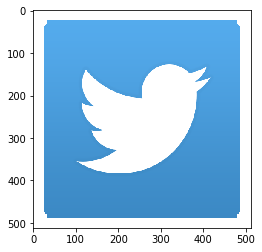

In [6]:
img = img[..., :3]
# img = cv.resize(img, (340, 300))
plt.imshow(img)

In [7]:
img.shape

(512, 512, 3)

In [8]:
xs, ys, = [], []

for row in range(img.shape[0]):
    for col in range(img.shape[1]):
        xs.append([row, col])
        ys.append(img[row][col])
        
xs = np.array(xs) #x's are the (x,y) pairs in the space
ys = np.array(ys) #y's are the color values that go on there. 

In [9]:
xs.shape
    

(262144, 2)

In [10]:
ys.shape

(262144, 3)

(array([ 53248.,  52224.,  52224.,  52224.,  52224.,  52224.,  52224.,
         52224.,  52224.,  53248.]),
 array([   0. ,   51.1,  102.2,  153.3,  204.4,  255.5,  306.6,  357.7,
         408.8,  459.9,  511. ]),
 <a list of 10 Patch objects>)

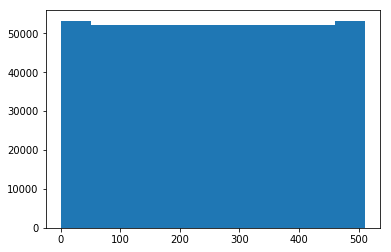

In [11]:
plt.hist(xs.ravel())

In [12]:
normXs = (xs - np.mean(xs)) / np.std(xs)

(array([ 53248.,  52224.,  52224.,  52224.,  52224.,  52224.,  52224.,
         52224.,  52224.,  53248.]),
 array([-1.72867119, -1.38293695, -1.03720272, -0.69146848, -0.34573424,
         0.        ,  0.34573424,  0.69146848,  1.03720272,  1.38293695,
         1.72867119]),
 <a list of 10 Patch objects>)

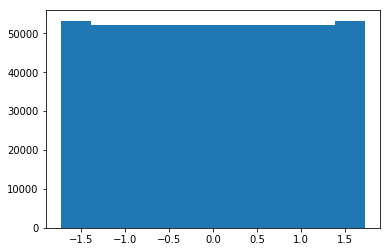

In [13]:
plt.hist(normXs.ravel())

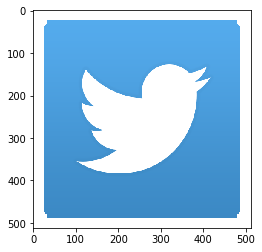

In [239]:
plt.imshow(ys.reshape(img.shape))

In [240]:
X = tf.placeholder(tf.float32, shape = [None, 2])
Y = tf.placeholder(tf.float32, shape = [None, 3])

In [241]:
W1 = tf.get_variable(name='W1', 
                     shape=[2,100], 
                     dtype = tf.float32, 
                     initializer = tf.random_normal_initializer())

# W2 = tf.get_variable(name = 'W2',
#                      shape = )

B1 = tf.get_variable(name = 'B1',
                    shape = [100],
                    dtype = tf.float32,
                    initializer = tf.random_normal_initializer) # adding a bias

In [242]:
H1 = tf.nn.relu(tf.matmul(X, W1) + B1) #We could also have another multiplciation instead of NL

In [243]:
W2 = tf.get_variable(name = 'W2',
                     shape = [100, 3],
                     dtype = tf.float32,
                     initializer = tf.random_normal_initializer())

predictedY = tf.nn.relu(tf.matmul(H1, W2))

In [244]:
tf.abs(predictedY - Y).shape # we need to reduce this to something we can mean better

TensorShape([Dimension(None), Dimension(3)])

In [254]:
cost = tf.reduce_sum(tf.abs(predictedY - Y)) 

# tf.abs(predictedY - Y) #L1 cost
# (predictedY - Y) * (predictedY - Y) #L2 cost

In [255]:
cost = tf.reduce_mean(cost)

In [256]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost)

[None, 3.1197159]
[None, 2.6265595]
[None, 2.1849558]
[None, 1.80163]
[None, 1.4848562]
[None, 1.2163992]
[None, 0.99019736]
[None, 0.8225053]
[None, 0.73423594]
[None, 0.69101137]
[None, 0.67088348]
[None, 0.66087985]
[None, 0.65416443]
[None, 0.65035772]
[None, 0.64853299]
[None, 0.64740044]
[None, 0.64651823]
[None, 0.6457727]
[None, 0.64511579]
[None, 0.64452791]
[None, 0.64399368]
[None, 0.64350045]
[None, 0.64304453]
[None, 0.64261985]
[None, 0.64221865]


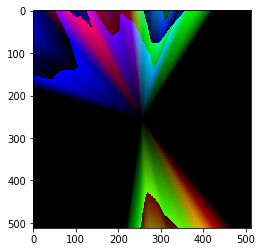

In [257]:
n_iterations = 250

with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    
    prev_training_cost = 0.0
    for it_i in range(n_iterations):
        c = sess.run([optimizer, cost], feed_dict={X: normXs, Y: ys})
        
        if it_i % 10 == 0:
            predictedys = predictedY.eval(feed_dict={X: normXs}, session=sess)
            print(c)
plt.imshow(predictedys.reshape(img.shape))

In [405]:
from tensorflow.contrib import slim
tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape = [None, 2])
Y = tf.placeholder(tf.float32, shape = [None, 3])

In [406]:
neruons = 100

In [424]:
H1 = slim.linear(X, neruons, activation_fn = tf.nn.relu)
H2 = slim.linear(H1, neruons, activation_fn = tf.nn.relu)
H3 = slim.linear(H2, neruons, activation_fn = tf.nn.relu)
H4 = slim.linear(H3, neruons, activation_fn = tf.nn.relu)
H5 = slim.linear(H4, neruons, activation_fn = tf.nn.relu)
H6 = slim.linear(H5, neruons, activation_fn = tf.nn.relu)
H7 = slim.linear(H6, neruons, activation_fn = tf.nn.relu)
H8 = slim.linear(H7, neruons, activation_fn = tf.nn.relu)
H9 = slim.linear(H8, neruons, activation_fn = tf.nn.relu)
H10 = slim.linear(H9, neruons, activation_fn = tf.nn.relu)

predictedY = slim.linear(H10, 3)

In [425]:
feature_cost = tf.reduce_sum(tf.abs(predictedY - Y), 1)
newcost = tf.reduce_mean(feature_cost)

In [426]:
sess = tf.InteractiveSession()

In [427]:
sess.run(tf.global_variables_initializer())

In [428]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.0001).minimize(newcost)

[None, 2.1106043]


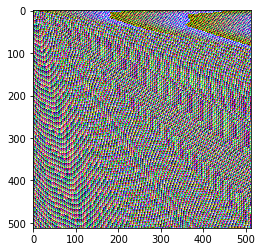

In [383]:
print(sess.run([optimizer, newcost], feed_dict={X: normXs, Y: ys}))

predictedys = sess.run(predictedY, feed_dict={X:xs})

plt.imshow(predictedys.reshape(img.shape))

In [384]:
# Batch descent using Stochastic mini batch graident descent. (feeding the algo small parts
# of the image so it can optize parts at a time)

In [429]:
batchSize = 50
iterations = 100

for i in range(iterations):
    randIndexes = np.random.permutation(range(len(xs)))
    xs[randIndexes]
    ys[randIndexes]
    
    numBatches = len(randIndexes) // batchSize
    
    for batch in range(numBatches): 
        batchIndexes = randIndexes[batch * batchSize : (batch + 1) * batchSize]
        
        sess.run(optimizer, feed_dict = {X: xs[batchIndexes], Y: ys[batchIndexes]})
        
    training_cost = sess.run(newcost, feed_dict={X: xs, Y:ys})
    print(i, training_cost)

0 0.663862
1 0.500952
2 0.445069
3 0.426494
4 0.438944
5 0.430002
6 0.423734
7 0.423213
8 0.418335
9 0.419608
10 0.406732
11 0.40919
12 0.404666
13 0.40712
14 0.400808
15 0.399569
16 0.397299
17 0.397199
18 0.397964
19 0.400612
20 0.393994
21 0.402965
22 0.386254
23 0.38158
24 0.380804
25 0.378372
26 0.378894
27 0.371127
28 0.368512
29 0.367922
30 0.364693
31 0.359839
32 0.365089
33 0.356501
34 0.354778
35 0.358095
36 0.349321
37 0.346559
38 0.341825
39 0.340877
40 0.337022
41 0.335767
42 0.330544
43 0.327267
44 0.3201
45 0.318267
46 0.314113
47 0.312248
48 0.313594
49 0.301377
50 0.293504
51 0.290905
52 0.28547
53 0.286281
54 0.27671
55 0.276099
56 0.278362
57 0.266886
58 0.26647
59 0.256717
60 0.256575
61 0.254287
62 0.252366
63 0.242138
64 0.246907
65 0.258424
66 0.235151
67 0.235572
68 0.229554
69 0.227175
70 0.222291
71 0.227212
72 0.265933
73 0.220886
74 0.220305
75 0.213365
76 0.210956
77 0.220784
78 0.218585
79 0.207811
80 0.202814
81 0.205551
82 0.196746
83 0.198562
84 0.19925

In [430]:
predictedys = sess.run(predictedY, feed_dict={X:xs})


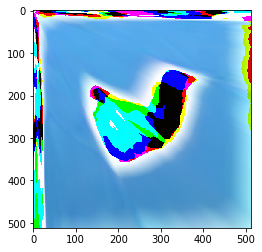

In [431]:
plt.imshow(predictedys.reshape(img.shape))